# Item similarity recommendation

The dataset used for the demonstration of item similarity recommendation is the subset of the movies lens dataset. A basic recommendation system will be built which will suggest movies that are most similar to a particular movie.

### Import libraries
The basic packages to deal with data like numpy and pandas are imported. ALong with this the visualization libraries are imported which is matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Read data

The column names are assigned and the data is read.

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset/df.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now the movie titles are appended to the dataframe.

In [3]:
titles = pd.read_csv("dataset/movie_title")
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df = pd.merge(df,titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Visualization

A dataframe for ratings is created on the basis of its total count and avergae. The mean is calculated by calling the mean() function.

In [5]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


The total is calculated by calling the count() function.

In [6]:
ratings['total_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,total_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now the histograms can be visualized for the mean ratings and the total ratings given by the users.

<AxesSubplot:>

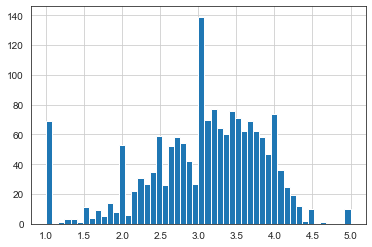

In [7]:
ratings['rating'].hist(bins=50)

So the mean ratings are in the range 1 to 5 and their distribution can be seen where the mean lies near the rating 3.5.

<AxesSubplot:>

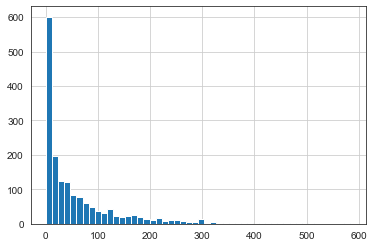

In [8]:
ratings['total_ratings'].hist(bins=50)

From this plot, it can be inferre that only the most famous movies have been rated a lot by the users and the ratings decreases if the movies are less fmaous.

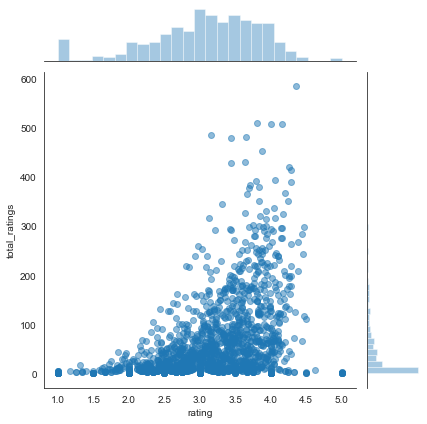

In [9]:
sns.jointplot(x='rating',y='total_ratings',data=ratings,alpha=0.5)

This plot shows the relation between the average ratings and the total ratings. From the plot it can be inferred that if the total number o

### Build the system

The user id and movie titles are extracted and made the index and column respectively. So this way each user's rating for each movie can be presented.

In [10]:
final_df = df.pivot_table(index='user_id',columns='title',values='rating')
final_df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now one movie is chosen which is Toy story and falls under the fantasy genre. The user ratings are obtained.

In [11]:
toy_ratings = final_df['Toy Story (1995)']
toy_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

Now the correlation of the other movies with the respective movie is found out using the corrwith() method.

In [12]:
similar_to_toy = final_df.corrwith(toy_ratings)

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Now these correlations are presented in a dataframe form and the the null values are dropped.

In [13]:
corr_toy = pd.DataFrame(similar_to_toy,columns=['Correlation'])
corr_toy.dropna(inplace=True)
corr_toy.head()

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


Now if these correlations are sorted in descending order then we get the movies correlated to the toy story.

In [14]:
corr_toy.sort_values('Correlation',ascending=False).head()

,Correlation
title,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Reckless (1995),1.0
"Stranger, The (1994)",1.0
Ladybird Ladybird (1994),1.0
Infinity (1996),1.0


But some of the movies in the top might have been only watched by one user who gave the highest rating and therefore could be misleading. So we will extract the movies which have more than 100 reviews.

In [15]:
corr_toy = corr_toy.join(ratings['total_ratings'])
corr_toy.head()

,Correlation,total_ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [16]:
corr_toy[corr_toy['total_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,total_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


So these are the few movies which are similar to the movie 'Toy Story'. All these movies also fall under the ctaegory of fantasy.